# Predictive Telecom Customer Churn using Machine Learning

We attempt to build a predictive model for predicting customers who will churn with less than or exactly 12 months with Telco, their telecom provider.

## Load Cleaned Dataset with Previous Libraries and Notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

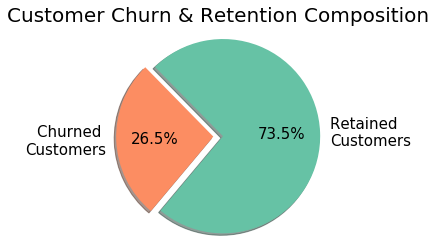

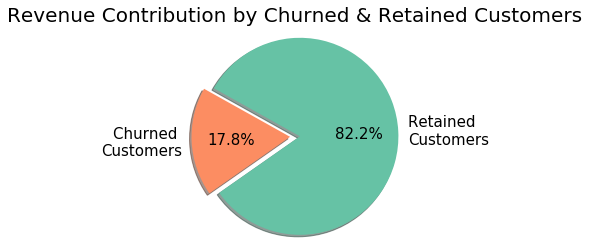

avg churned customer total charge = 1531.8
avg retained customer total charge = 2555.34


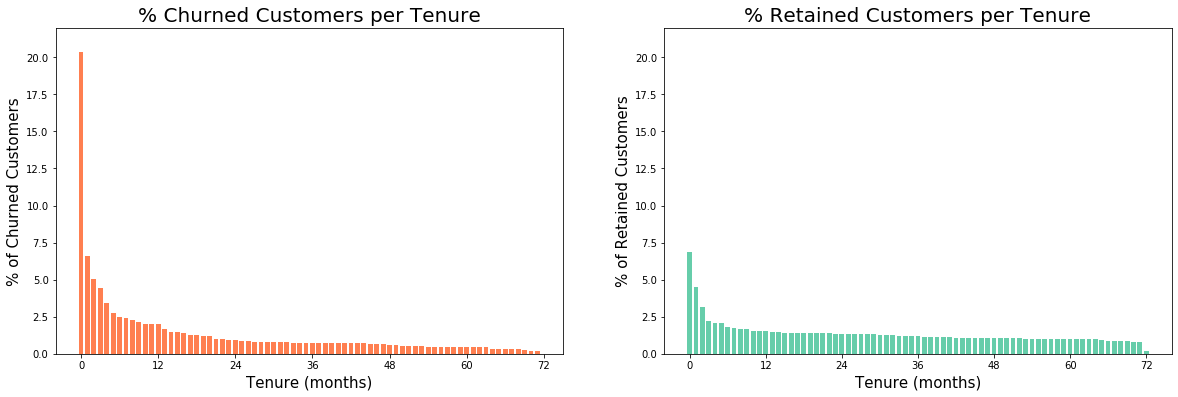

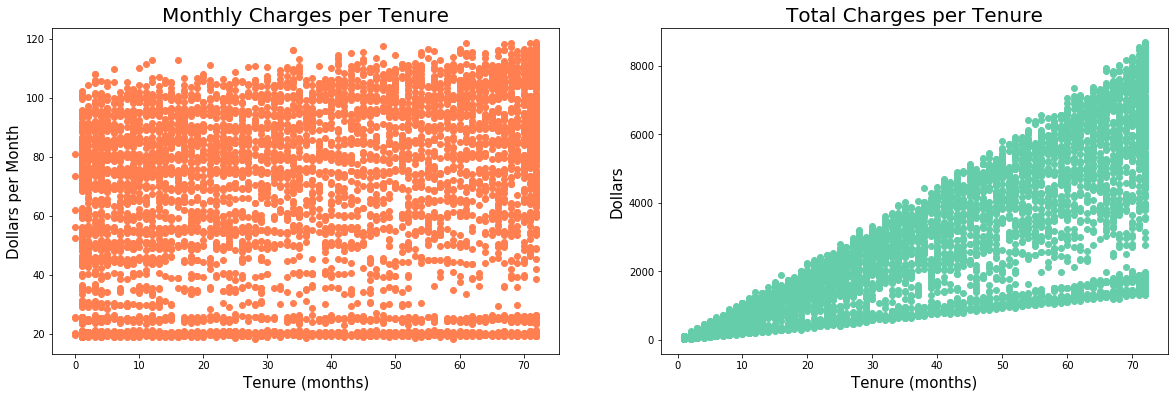

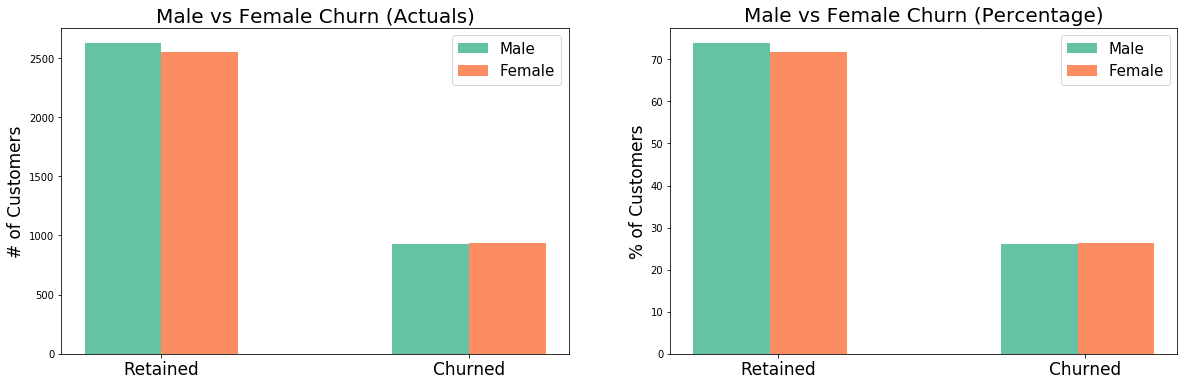

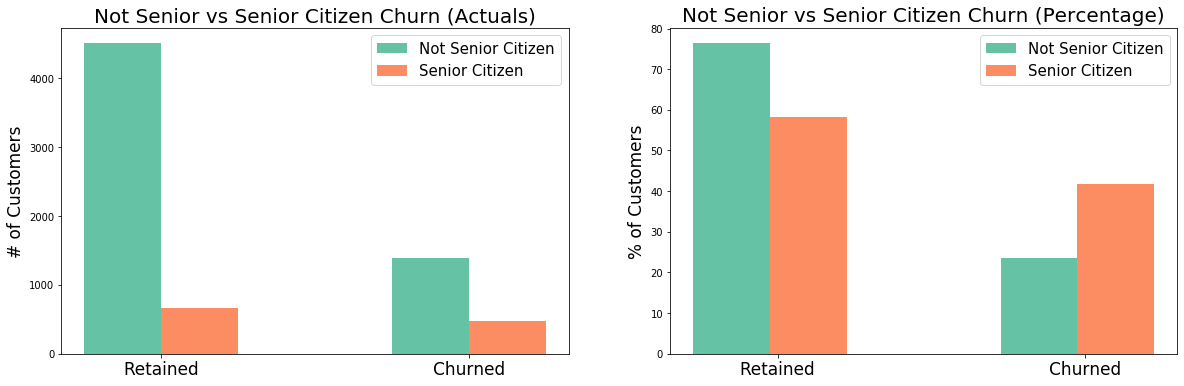

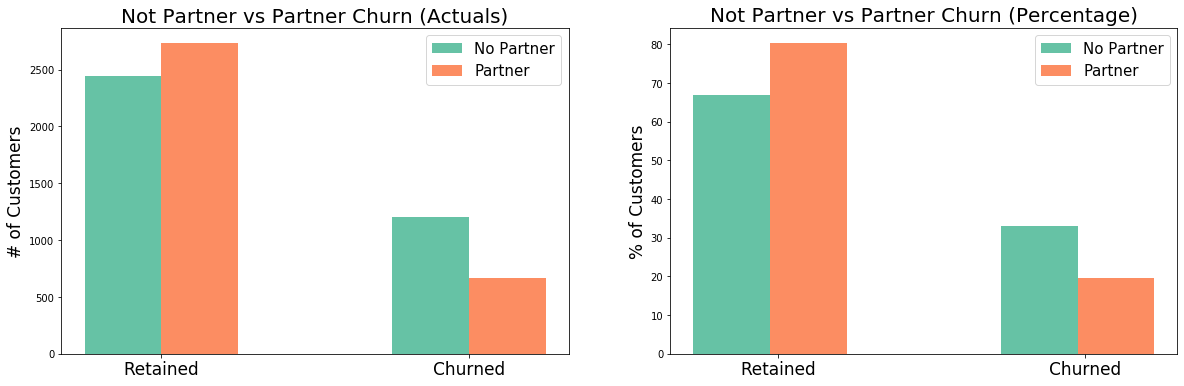

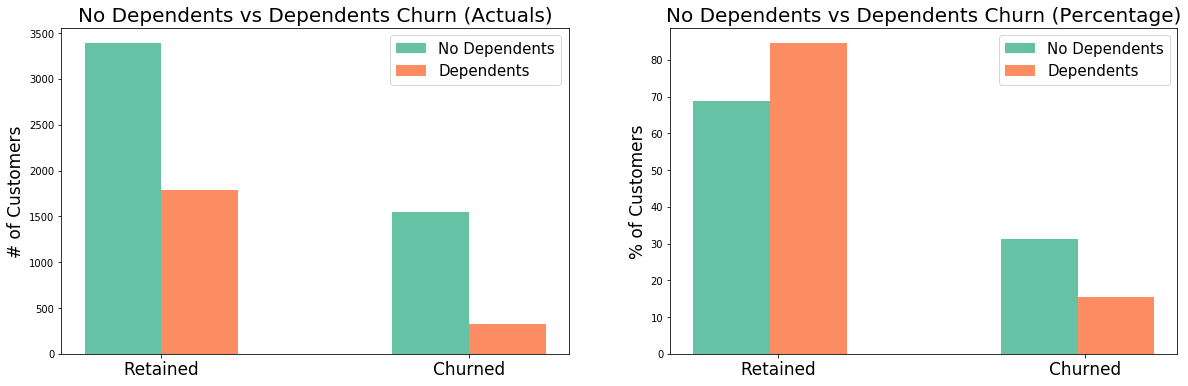

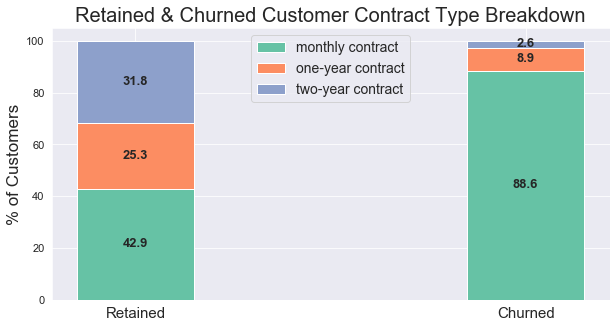

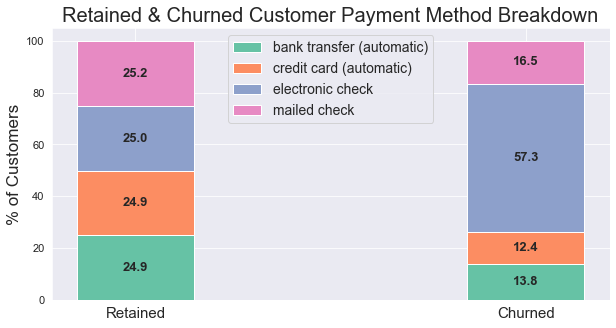

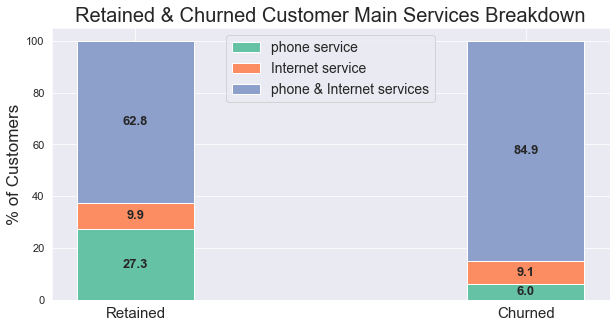

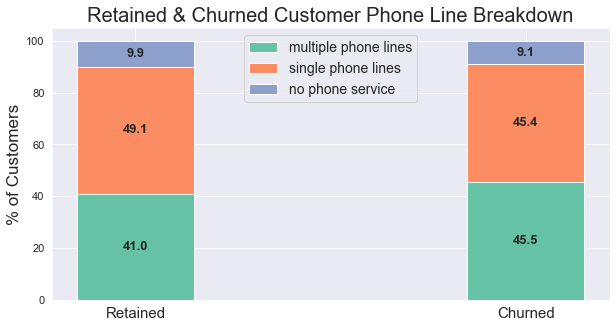

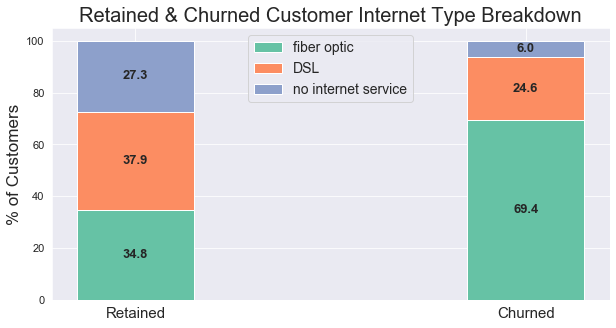

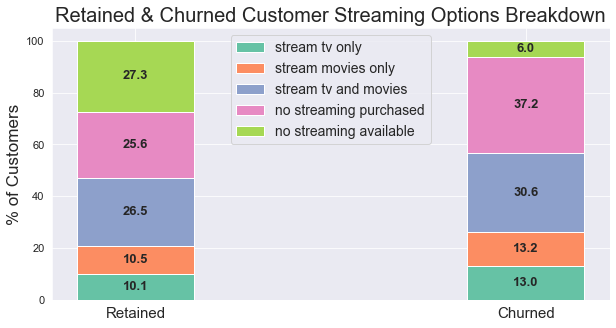

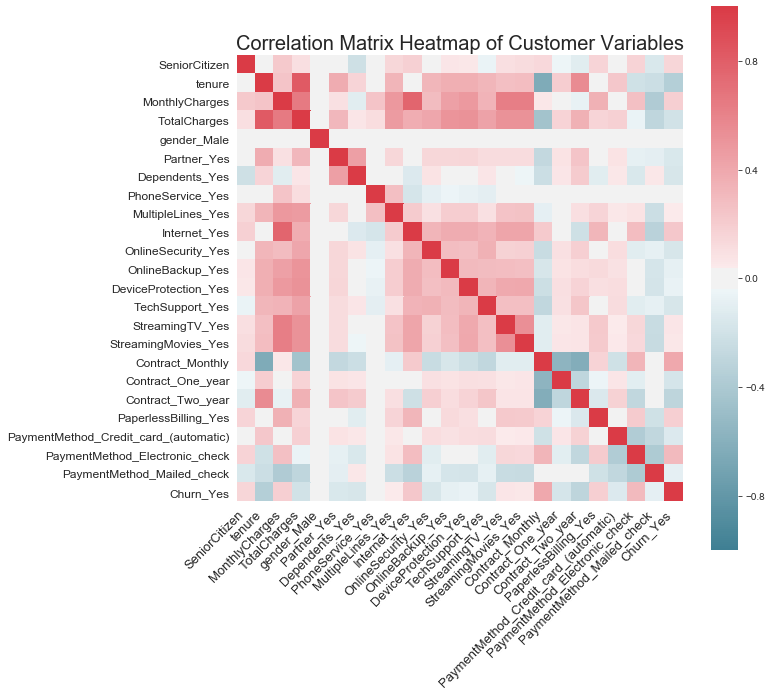

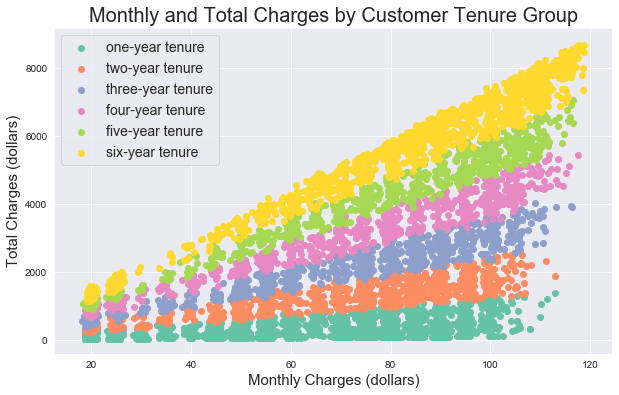

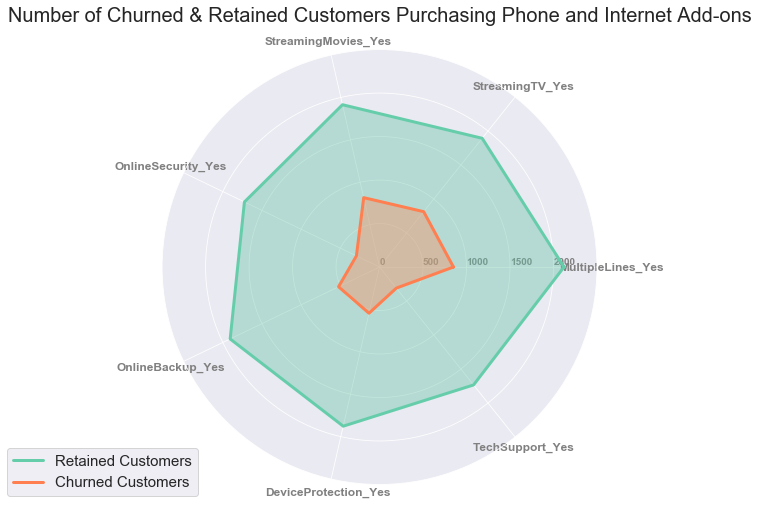

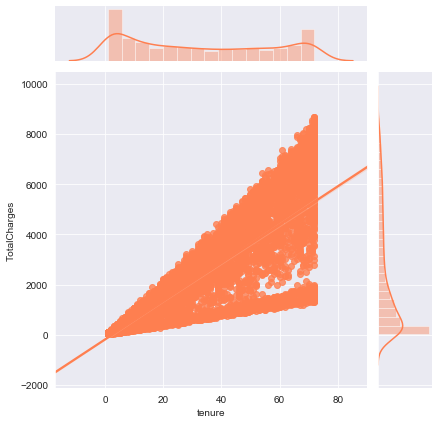

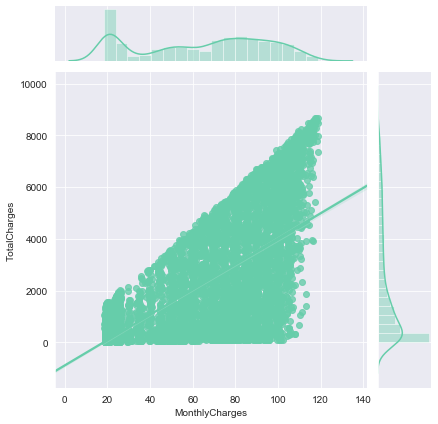

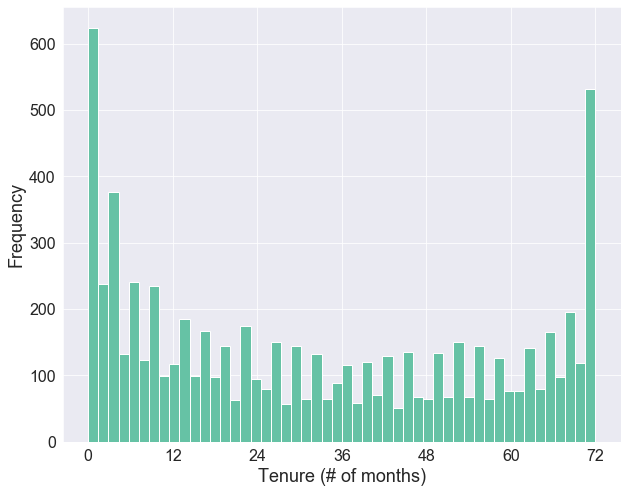

ùêª‚ÇÄ: Œº <= 12
ùêª‚Çê: Œº ‚â† 12
The t-statistic is 69.6155102661739
The p-value is 0.0


In [1]:
# Load clean and data-wrangled dataset from previous notebook
%run '/Users/sergiogutierrez/Springboard_projects/Capstone 1/Exploratory Data Analysis (Inferential Statistics) on Telco Data Science Capstone Project.ipynb'

## Data Preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df['DSL_Yes'] = np.where((df.InternetService_Fiber_optic==0) & (df.InternetService_No==0), 1, 0)
df['Tenure_Less_Or_At_12Months'] = np.where((df.tenure <= 12) & (df.Churn_Yes ==1), 1, 0)

model_df = df.rename(columns={'customerID': 'Customer_ID', 'SeniorCitizen': 'SeniorCitizen_Yes', 'tenure': 'Tenure', 
                              'gender_Male': 'Gender_Male','InternetService_Fiber_optic' : 'Fiber_Optic_Yes', 
                              'Contract_Monthly' : 'Contract_Monthly_Yes','Contract_One_year': 'Contract_One_Year_Yes', 
                              'Contract_Two_year': 'Contract_Two_Year_Yes'})

model_df = model_df[model_df.columns.drop(list(df.filter(regex='No'))) 
           & model_df.columns.drop(['PaymentMethod_Credit_card_(automatic)',
                              'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check', 
                              'PaperlessBilling_Yes'])]

model_df = model_df.reindex(columns=['Customer_ID', 'Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 
                          'PhoneService_Yes','MultipleLines_Yes', 'Internet_Yes', 'DSL_Yes', 'Fiber_Optic_Yes',
                          'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes','TechSupport_Yes', 
                          'StreamingTV_Yes', 'StreamingMovies_Yes','Contract_Monthly_Yes', 'Contract_One_Year_Yes',
                          'Contract_Two_Year_Yes', 'MonthlyCharges', 'TotalCharges', 'Churn_Yes', 'Tenure', 'Tenure_Less_Or_At_12Months'])

model_df.fillna(model_df.mean(), inplace=True)

model_df.head()

Customer_ID  Gender_Male  SeniorCitizen_Yes  Partner_Yes  Dependents_Yes  \
0  7590-VHVEG            0                  0            1               0   
1  5575-GNVDE            1                  0            0               0   
2  3668-QPYBK            1                  0            0               0   
3  7795-CFOCW            1                  0            0               0   
4  9237-HQITU            0                  0            0               0   

   PhoneService_Yes  MultipleLines_Yes  Internet_Yes  DSL_Yes  \
0                 0                  0             1        1   
1                 1                  0             1        1   
2                 1                  0             1        1   
3                 0                  0             1        1   
4                 1                  0             1        0   

   Fiber_Optic_Yes  ...  StreamingTV_Yes  StreamingMovies_Yes  \
0                0  ...                0                    0   
1                0  ...                0                    0   
2                0  ...                0                    0   
3                0  ...                0                    0   
4                1  ...                0                    0   

   Contract_Monthly_Yes  Contract_One_Year_Yes  Contract_Two_Year_Yes  \
0                     1                      0                      0   
1                     0                      1                      0   
2                     1                      0                      0   
3                     0                      1                      0   
4                     1                      0                      0   

   MonthlyCharges  TotalCharges  Churn_Yes  Tenure  Tenure_Less_Or_At_12Months  
0           29.85         29.85          0       1                           0  
1           56.95       1889.50          0      34                           0  
2           53.85        108.15          1       2                           1  
3           42.30       1840.75          0      45                           0  
4           70.70        151.65          1       2                           1  

[5 rows x 24 columns]

## Snapshot of Customers Churning Within or Exactly 12 Months

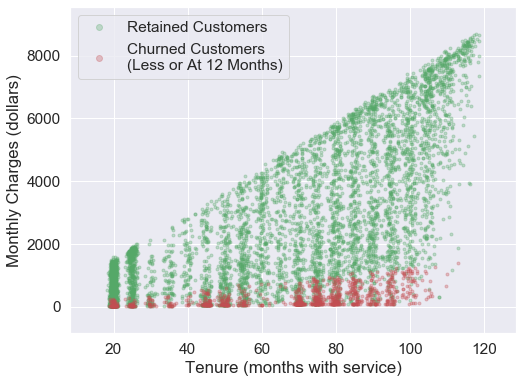

In [4]:
sns.set(font_scale=1.4)

LessOrAt12Months_df = df.loc[df.Tenure_Less_Or_At_12Months==1]
MoreThan12Months_df = df.loc[df.Tenure_Less_Or_At_12Months==0]

plt.figure(figsize=(8,6))
plt.plot(MoreThan12Months_df.MonthlyCharges, MoreThan12Months_df.TotalCharges, marker='.', linestyle='none', alpha=0.3, color='g', label='Retained Customers')
plt.plot(LessOrAt12Months_df.MonthlyCharges, LessOrAt12Months_df.TotalCharges, marker='.', linestyle='none', alpha=0.3, color='r', label='Churned Customers \n(Less or At 12 Months)')

plt.xlabel('Tenure (months with service)')
plt.ylabel('Monthly Charges (dollars)')
plt.legend(markerscale=2, frameon=True)
plt.margins(0.1)

plt.show()

## Train-Test-Split Data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(model_df.iloc[:, 1:21].values,
                                                    (model_df.Tenure_Less_Or_At_12Months==1).values, 
                                                    train_size = 0.75, random_state=42)

X_scale_train = preprocessing.scale(X_train)
X_scale_test = preprocessing.scale(X_test)

print("Training set: {}".format(X_train.shape, y_train.shape))
print("Testing set: {}".format(X_test.shape, y_test))

Training set: (5282, 20)
Testing set: (1761, 20)


## Support Vector Machine

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc = SVC(random_state=42, probability=True, gamma='auto')

svc.fit(X_scale_train, y_train)
svc_y_pred = svc.predict(X_scale_test)

svc_cr_df = pd.DataFrame(classification_report(y_test, svc_y_pred, output_dict=True)).T
svc_cr_df['support'] = svc_cr_df['support'].astype(int)

svc_cr_df.iloc[[0,1,2,4], :]

f1-score  precision    recall  support
False         0.946888   0.927842  0.966733     1503
True          0.640177   0.743590  0.562016      258
accuracy      0.907439   0.907439  0.907439        0
weighted avg  0.901953   0.900847  0.907439     1761

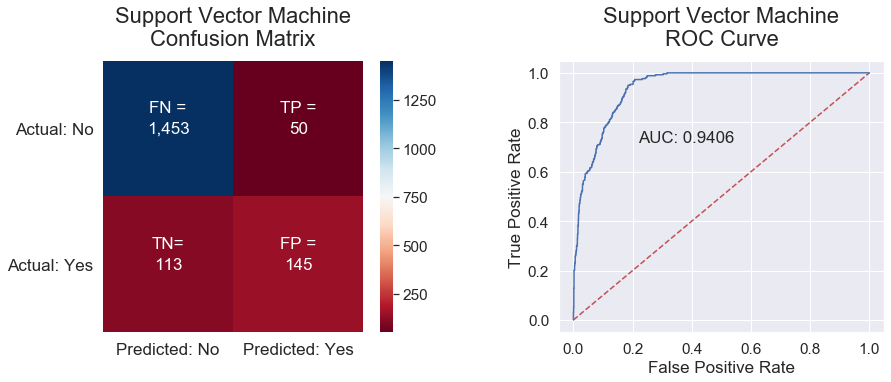

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from matplotlib import rcParams
rcParams['axes.titlepad'] = 15 
text_size = 17

svc_confusion_matrix = confusion_matrix(y_test, svc_y_pred)
svc_confusion_matrix.astype(int)
svc_cm_df = pd.DataFrame(svc_confusion_matrix)

figure, ax = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

sns.heatmap(svc_cm_df, cmap='RdBu', annot=True, annot_kws={'size':text_size}, fmt=",", ax=ax[0])
ax[0].set_xticklabels(['Predicted: No', 'Predicted: Yes'], ha="center", size=text_size)
ax[0].set_yticklabels(['Actual: No', 'Actual: Yes'], rotation=360, ha="right", size=text_size)

ax[0].set_title('Support Vector Machine\nConfusion Matrix', size=22)
ax[0].text(0.5, 1.4, 'TN=', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(0.5, 0.4, 'FN =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 1.4, 'FP =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 0.4, 'TP =', color='w', va='bottom', ha='center', size=text_size)

svc_y_pred_prob = svc.predict_proba(X_scale_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svc_y_pred_prob)

ax[1].plot([0, 1], [0, 1], 'k--', color='r')
ax[1].plot(fpr, tpr)
ax[1].text(0.22, 0.72, "AUC: {}".format(round(roc_auc_score(y_test, svc_y_pred_prob), 4)))
ax[1].set_xlabel('False Positive Rate', size=text_size)
ax[1].set_ylabel('True Positive Rate', size=text_size)
ax[1].set_title('Support Vector Machine\nROC Curve', size=22)

plt.show()

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(random_state=42)

# Fit the model on the trainng data.
lrg.fit(X_train, y_train)
lrg_y_pred = lrg.predict(X_test)

lrg_cr_df = pd.DataFrame(classification_report(y_test, lrg_y_pred, output_dict=True)).T
lrg_cr_df['support'] = lrg_cr_df['support'].astype(int)

lrg_cr_df.iloc[[0,1,2,4], :]

f1-score  precision    recall  support
False         0.947962   0.944518  0.951430     1503
True          0.689109   0.704453  0.674419      258
accuracy      0.910846   0.910846  0.910846        0
weighted avg  0.910038   0.909347  0.910846     1761

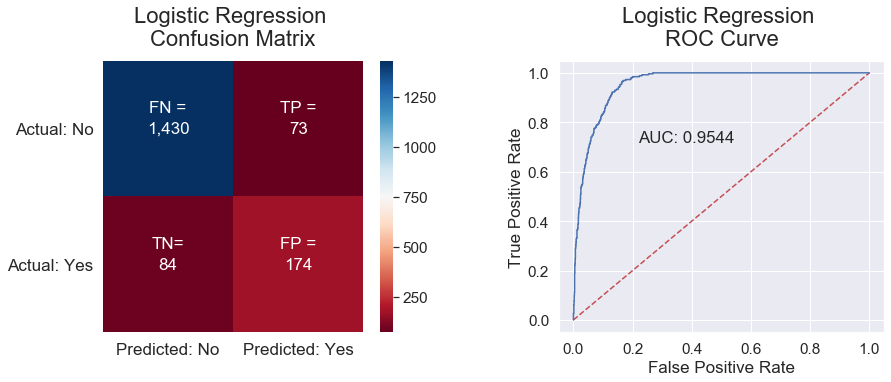

In [9]:
lrg_confusion_matrix = confusion_matrix(y_test, lrg_y_pred)
lrg_confusion_matrix.astype(int)
lrg_cm_df = pd.DataFrame(lrg_confusion_matrix)

figure, ax = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

sns.heatmap(lrg_cm_df, cmap='RdBu', annot=True, annot_kws={'size':text_size}, fmt=",", ax=ax[0])
ax[0].set_xticklabels(['Predicted: No', 'Predicted: Yes'], ha="center", size=text_size)
ax[0].set_yticklabels(['Actual: No', 'Actual: Yes'], rotation=360, ha="right", size=text_size)

ax[0].set_title('Logistic Regression \nConfusion Matrix', size=22)
ax[0].text(0.5, 1.4, 'TN=', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(0.5, 0.4, 'FN =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 1.4, 'FP =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 0.4, 'TP =', color='w', va='bottom', ha='center', size=text_size)

lrg_y_pred_prob = lrg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lrg_y_pred_prob)

ax[1].plot([0, 1], [0, 1], 'k--', color='r')
ax[1].plot(fpr, tpr)
ax[1].text(0.22, 0.72, "AUC: {}".format(round(roc_auc_score(y_test, lrg_y_pred_prob), 4)))
ax[1].set_xlabel('False Positive Rate', size=text_size)
ax[1].set_ylabel('True Positive Rate', size=text_size)
ax[1].set_title('Logistic Regression \nROC Curve', size=22)

plt.show()

# Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, n_estimators=100)

rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

rfc_cr_df = pd.DataFrame(classification_report(y_test, rfc_y_pred, output_dict=True)).T
rfc_cr_df['support'] = rfc_cr_df['support'].astype(int)

rfc_cr_df.iloc[[0,1,2,4], :]

f1-score  precision    recall  support
False         0.939274   0.931893  0.946773     1503
True          0.626016   0.658120  0.596899      258
accuracy      0.895514   0.895514  0.895514        0
weighted avg  0.893379   0.891783  0.895514     1761

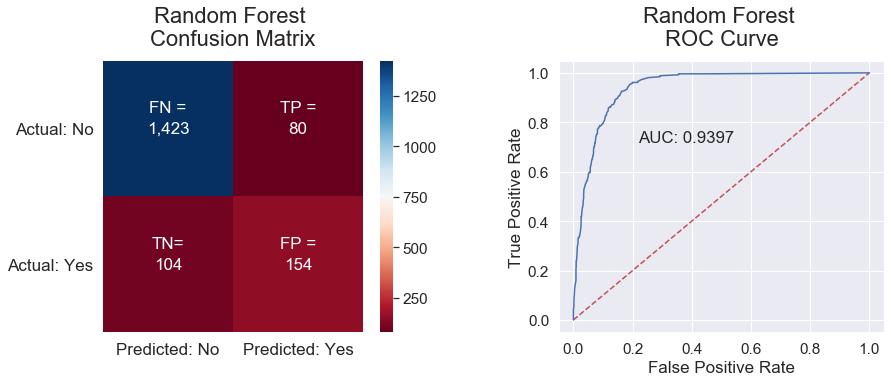

In [11]:
rfc_confusion_matrix = confusion_matrix(y_test, rfc_y_pred)
rfc_confusion_matrix.astype(int)
rfc_cm_df = pd.DataFrame(rfc_confusion_matrix)

figure, ax = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

sns.heatmap(rfc_cm_df, cmap='RdBu', annot=True, annot_kws={'size':text_size}, fmt=",", ax=ax[0])
ax[0].set_xticklabels(['Predicted: No', 'Predicted: Yes'], ha="center", size=text_size)
ax[0].set_yticklabels(['Actual: No', 'Actual: Yes'], rotation=360, ha="right", size=text_size)

ax[0].set_title('Random Forest \nConfusion Matrix', size=22)
ax[0].text(0.5, 1.4, 'TN=', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(0.5, 0.4, 'FN =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 1.4, 'FP =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 0.4, 'TP =', color='w', va='bottom', ha='center', size=text_size)

rfc_y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rfc_y_pred_prob)

ax[1].plot([0, 1], [0, 1], 'k--', color='r')
ax[1].plot(fpr, tpr)
ax[1].text(0.22, 0.72, "AUC: {}".format(round(roc_auc_score(y_test, rfc_y_pred_prob), 4)))
ax[1].set_xlabel('False Positive Rate', size=text_size)
ax[1].set_ylabel('True Positive Rate', size=text_size)
ax[1].set_title('Random Forest \nROC Curve', size=22)

plt.show()

# Tuning Parameters for Machine Learning Models

In [12]:
from sklearn.model_selection import GridSearchCV

svc_param_grid = {"kernel": ['linear', 'rbf', 'poly'],
                  "C": np.arange(20, 220, 20)}

svc_cv = GridSearchCV(estimator=svc, param_grid=svc_param_grid, cv=3)

svc_cv.fit(X_scale_train, y_train)

print("Accuracy scores: {}".format(np.around(svc_cv.cv_results_['mean_test_score'], decimals=6)))
print("Best score: {}".format(round(svc_cv.best_score_, 6)))
print("Best score's parameters: {}".format(svc_cv.best_params_))

Accuracy scores: [0.905718 0.893601 0.889814 0.905528 0.893033 0.886028 0.905907 0.891518
 0.886407 0.906664 0.891708 0.885649 0.906664 0.891897 0.884703 0.906664
 0.892086 0.88281  0.906664 0.892654 0.882242 0.906664 0.893222 0.882242
 0.906664 0.893412 0.881484 0.906664 0.89379  0.880916]
Best score: 0.906664
Best score's parameters: {'C': 80, 'kernel': 'linear'}


In [13]:
lrg_param_grid = {"C": np.logspace(-3,4,num=8, dtype='float'), 
                  "penalty": ['l1', 'l2']}

lrg_cv = GridSearchCV(estimator=lrg, param_grid=lrg_param_grid, cv=3)

lrg_cv.fit(X_train, y_train)

print("Accuracy scores: {}".format(np.around(lrg_cv.cv_results_['mean_test_score'], decimals=6)))
print("Best score: {}".format(round(lrg_cv.best_score_, 6)))
print("Best score's parameters: {}".format(lrg_cv.best_params_)) 

Accuracy scores: [0.869746 0.881674 0.883567 0.897766 0.898902 0.90212  0.903446 0.905718
 0.904014 0.904771 0.903824 0.905718 0.903824 0.904771 0.903824 0.905718]
Best score: 0.905718
Best score's parameters: {'C': 1.0, 'penalty': 'l2'}


In [14]:
rfc_param_grid = {'n_estimators': np.arange(25, 375, 25),
                  'max_depth' : np.arange(2, 12, 2)}

rfc_cv = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=3)

rfc_cv.fit(X_train, y_train)

print("Accuracy scores: {}".format(np.around(rfc_cv.cv_results_['mean_test_score'], decimals=6)))
print("Best score: {}".format(round(rfc_cv.best_score_, 6)))
print("Best score's parameters: {}".format(rfc_cv.best_params_)) 

Accuracy scores: [0.852518 0.852518 0.852518 0.852518 0.852518 0.852518 0.852518 0.852518
 0.852518 0.852518 0.852518 0.852518 0.852518 0.852518 0.87713  0.875426
 0.87978  0.875994 0.872965 0.872397 0.872965 0.869368 0.870314 0.866149
 0.868421 0.870125 0.87164  0.873911 0.902499 0.897955 0.899849 0.899091
 0.900795 0.901552 0.900984 0.899659 0.899849 0.899281 0.899091 0.898713
 0.899091 0.899281 0.904014 0.906096 0.905907 0.908368 0.9078   0.907989
 0.909315 0.908179 0.909315 0.908936 0.907421 0.9078   0.907611 0.907611
 0.904582 0.904771 0.905718 0.906475 0.907043 0.9078   0.905718 0.906853
 0.907421 0.907232 0.907232 0.907611 0.906475 0.906664]
Best score: 0.909315
Best score's parameters: {'max_depth': 8, 'n_estimators': 175}


# Recommendation System

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option('display.max_columns', 50)

services_df = model_df.iloc[:, 0:16]
recommender_df = pd.pivot_table(services_df, index='Customer_ID')
recommender_df.head()

DSL_Yes  Dependents_Yes  DeviceProtection_Yes  Fiber_Optic_Yes  \
Customer_ID                                                                   
0002-ORFBO         1               1                     0                0   
0003-MKNFE         1               0                     0                0   
0004-TLHLJ         0               0                     1                1   
0011-IGKFF         0               0                     1                1   
0013-EXCHZ         0               0                     0                1   

             Gender_Male  Internet_Yes  MultipleLines_Yes  OnlineBackup_Yes  \
Customer_ID                                                                   
0002-ORFBO             0             1                  0                 1   
0003-MKNFE             1             1                  1                 0   
0004-TLHLJ             1             1                  0                 0   
0011-IGKFF             1             1                  0                 1   
0013-EXCHZ             0             1                  0                 0   

             OnlineSecurity_Yes  Partner_Yes  PhoneService_Yes  \
Customer_ID                                                      
0002-ORFBO                    0            1                 1   
0003-MKNFE                    0            0                 1   
0004-TLHLJ                    0            0                 1   
0011-IGKFF                    0            1                 1   
0013-EXCHZ                    0            1                 1   

             SeniorCitizen_Yes  StreamingMovies_Yes  StreamingTV_Yes  \
Customer_ID                                                            
0002-ORFBO                   0                    0                1   
0003-MKNFE                   0                    1                0   
0004-TLHLJ                   0                    0                0   
0011-IGKFF                   1                    1                1   
0013-EXCHZ                   1                    0                1   

             TechSupport_Yes  
Customer_ID                   
0002-ORFBO                 1  
0003-MKNFE                 0  
0004-TLHLJ                 0  
0011-IGKFF                 0  
0013-EXCHZ                 1

In [16]:
cosine = cosine_similarity(recommender_df)
np.fill_diagonal(cosine, 0 )
similarity_with_services =pd.DataFrame(cosine,index=recommender_df.index)
similarity_with_services.columns=recommender_df.index
similarity_with_services.head()

Customer_ID  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ  \
Customer_ID                                                               
0002-ORFBO     0.000000    0.433013    0.316228    0.559017    0.668153   
0003-MKNFE     0.433013    0.000000    0.547723    0.516398    0.308607   
0004-TLHLJ     0.316228    0.547723    0.000000    0.707107    0.507093   
0011-IGKFF     0.559017    0.516398    0.707107    0.000000    0.717137   
0013-EXCHZ     0.668153    0.308607    0.507093    0.717137    0.000000   

Customer_ID  0013-MHZWF  0013-SMEOE  0014-BMAQU  0015-UOCOJ  0016-QLJIS  \
Customer_ID                                                               
0002-ORFBO     0.801784    0.639602    0.500000    0.474342    0.816497   
0003-MKNFE     0.617213    0.369274    0.577350    0.547723    0.589256   
0004-TLHLJ     0.338062    0.539360    0.632456    0.400000    0.387298   
0011-IGKFF     0.478091    0.858116    0.559017    0.424264    0.639010   
0013-EXCHZ     0.571429    0.797724    0.668153    0.507093    0.545545   

Customer_ID  0017-DINOC  0017-IUDMW  0018-NYROU  0019-EFAEP  0019-GFNTW  \
Customer_ID                                                               
0002-ORFBO     0.577350    0.714435    0.530330    0.500000    0.577350   
0003-MKNFE     0.500000    0.471405    0.408248    0.433013    0.333333   
0004-TLHLJ     0.365148    0.516398    0.670820    0.632456    0.365148   
0011-IGKFF     0.387298    0.730297    0.632456    0.670820    0.387298   
0013-EXCHZ     0.462910    0.654654    0.755929    0.534522    0.308607   

Customer_ID  0020-INWCK  0020-JDNXP  0021-IKXGC  0022-TCJCI  0023-HGHWL  \
Customer_ID                                                               
0002-ORFBO     0.589256    0.707107    0.316228    0.375000    0.353553   
0003-MKNFE     0.544331    0.408248    0.547723    0.721688    0.612372   
0004-TLHLJ     0.596285    0.298142    0.600000    0.632456    0.447214   
0011-IGKFF     0.737865    0.527046    0.565685    0.670820    0.474342   
0013-EXCHZ     0.503953    0.503953    0.676123    0.400892    0.377964   

Customer_ID  0023-UYUPN  0023-XUOPT  0027-KWYKW  0030-FNXPP  0031-PVLZI  ...  \
Customer_ID                                                              ...   
0002-ORFBO     0.353553    0.625000    0.668153    0.353553    0.612372  ...   
0003-MKNFE     0.408248    0.433013    0.462910    0.408248    0.235702  ...   
0004-TLHLJ     0.223607    0.632456    0.507093    0.447214    0.258199  ...   
0011-IGKFF     0.474342    0.782624    0.597614    0.316228    0.365148  ...   
0013-EXCHZ     0.566947    0.668153    0.714286    0.377964    0.436436  ...   

Customer_ID  9958-MEKUC  9959-WOFKT  9961-JBNMK  9962-BFPDU  9964-WBQDJ  \
Customer_ID                                                               
0002-ORFBO     0.612372    0.447214    0.375000    0.612372    0.408248   
0003-MKNFE     0.589256    0.645497    0.577350    0.235702    0.471405   
0004-TLHLJ     0.645497    0.707107    0.790569    0.258199    0.258199   
0011-IGKFF     0.730297    0.700000    0.894427    0.365148    0.365148   
0013-EXCHZ     0.545545    0.478091    0.668153    0.436436    0.436436   

Customer_ID  9965-YOKZB  9967-ATRFS  9968-FFVVH  9970-QBCDA  9971-ZWPBF  \
Customer_ID                                                               
0002-ORFBO     0.267261    0.353553    0.589256    0.353553    0.686406   
0003-MKNFE     0.771517    0.408248    0.680414    0.408248    0.566139   
0004-TLHLJ     0.676123    0.447214    0.596285    0.447214    0.620174   
0011-IGKFF     0.717137    0.316228    0.527046    0.316228    0.877058   
0013-EXCHZ     0.571429    0.377964    0.377964    0.377964    0.733799   

Customer_ID  9972-EWRJS  9972-NKTFD  9972-VAFJJ  9974-JFBHQ  9975-GPKZU  \
Customer_ID                                                               
0002-ORFBO     0.612372    0.790569    0.707107    0.707107    0.530330   
0003-MKNFE     0.235702    0.547723    0.272166    0.54433

In [17]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

sim_customers_top = find_n_neighbours(similarity_with_services,15)
sim_customers_top.head()

top1        top2        top3        top4        top5  \
Customer_ID                                                               
0002-ORFBO   7691-KGKGP  0604-THJFP  1684-FLBGS  5837-LXSDN  8976-OQHGT   
0003-MKNFE   4662-EKDPQ  0303-UNCIP  0096-FCPUF  6331-LWDTQ  0872-JCPIB   
0004-TLHLJ   1475-VWVDO  1391-UBDAR  7901-HXJVA  1092-GANHU  0927-LCSMG   
0011-IGKFF   0575-CUQOV  1217-VASWC  4550-VBOFE  5995-SNNEW  1400-MMYXY   
0013-EXCHZ   5701-YVSVF  2207-QPJED  9220-ZNKJI  4086-YQSNZ  0682-USIXD   

                   top6        top7        top8        top9       top10  \
Customer_ID                                                               
0002-ORFBO   5906-CVLHP  9281-CEDRU  3272-VUHPV  6214-EDAKZ  3174-AKMAS   
0003-MKNFE   5172-MIGPM  6429-SHBCB  5515-RUGKN  7442-YGZFK  4727-MCYZG   
0004-TLHLJ   2984-MIIZL  8617-ENBDS  6339-YPSAH  6719-OXYBR  6896-SRVYQ   
0011-IGKFF   2378-VTKDH  6646-VRFOL  6646-QVXLR  2439-LYPMQ  3757-NJYBX   
0013-EXCHZ   6847-KJLTS  5671-UUNXD  5569-OUICF  7240-FQLHE  2995-UPRYS   

                  top11       top12       top13       top14       top15  
Customer_ID                                                              
0002-ORFBO   0319-QZTCO  5816-JMLGY  2321-OMBXY  4578-PHJYZ  4431-EDMIQ  
0003-MKNFE   1666-JZPZT  2782-LFZVW  1260-TTRXI  3688-FTHLT  3583-EKAPL  
0004-TLHLJ   5022-KVDQT  5712-PTIWW  6869-FGJJC  2038-OEQZH  8705-DWKTI  
0011-IGKFF   8111-SLLHI  2806-MLNTI  2519-LBNQL  0100-DUVFC  4832-VRBMR  
0013-EXCHZ   1360-JYXKQ  5913-INRQV  4184-TJFAN  9972-VAFJJ  6199-IWKGC

In [18]:
i = 0

sim_customers = np.append(sim_customers_top.index[i], sim_customers_top.iloc[i, :])

customers_df = model_df.loc[model_df.Customer_ID.isin(sim_customers)].sort_values(by=['Customer_ID'])

def highlight_less_than(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] <= threshold
    return ['background-color: yellow' if is_max.any() else '' for v in is_max]

customers_df[customers_df.Churn_Yes==0].style.apply(highlight_less_than, threshold=12, column=['Tenure'], axis=1)